## Project 11 - Working with Geocoded Data


In [3]:
import sys
sys.version

'3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]'

In [2]:
!pip install wheel

In [1]:
!pip install GDAL-3.3.0-cp38-cp38-win_amd64.whl
!pip install Fiona-1.8.20-cp38-cp38-win_amd64.whl
!pip install Shapely-1.7.1-cp38-cp38-win_amd64.whl
!pip install datadotworld

Processing c:\users\faria\gitrepositories\assignments2021\in class projects\gdal-3.3.0-cp38-cp38-win_amd64.whl
Processing c:\users\faria\gitrepositories\assignments2021\in class projects\fiona-1.8.20-cp38-cp38-win_amd64.whl
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Processing c:\users\faria\gitrepositories\assignments2021\in class projects\shapely-1.7.1-cp38-cp38-win_amd64.whl
  Using cached datadotworld-1.8.0-py2.py3-none-any.whl (423 kB)
  Using cached tabulator-1.53.5-py2.py3-none-any.whl (72 kB)
  Using cached tableschema-1.20.2-py2.py3-none-any.whl (68 kB)
  Using cached configparser-3.8.1-py2.py3-none-any.whl (22 kB)
  Using cached datapackage-1.15.2-py2.py3-none-any.whl (85 kB)
  Using cached click-6.7-py2.py3-none-any.whl (71 kB)
Processing c:\users\faria\appdata\local\pip\cache\wheels\31\25\a5\d9b4b59636e1b9f183b7e1022e7be5c51141717b92398d7f9e\lin

In [5]:
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached pyproj-3.3.0-cp38-cp38-win_amd64.whl (6.3 MB)


In [6]:
import geopandas

In [7]:
#COVID19Map.py
### import all modules that we will use in this lesson
import geopandas
import numpy as np
import pandas as pd
# We won't actually use datetime directly. Since the dataframe index will use 
# data formatted as datetime64, I import it in case I need to use the datetime
# module to troubleshoot later 
import datetime
# you could technically call many of the submodules from matplotlib using mpl., 
#but for convenience we explicitly import submodules. These will be used for 
# constructing visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
import datadotworld as dw

In [9]:
# I include this dictionary to convenienlty cross reference state names and
# state abbreviations.
# I include this dictionary to convenienlty cross reference state names and
# state abbreviations.
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 
    'Wyoming': 'WY'}

plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})


In [10]:
fips_name = "fips_code"
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col ="Date", FIPS_name = fips_name)

In [11]:
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


Text(0.5, 1.0, 'Minnesota')

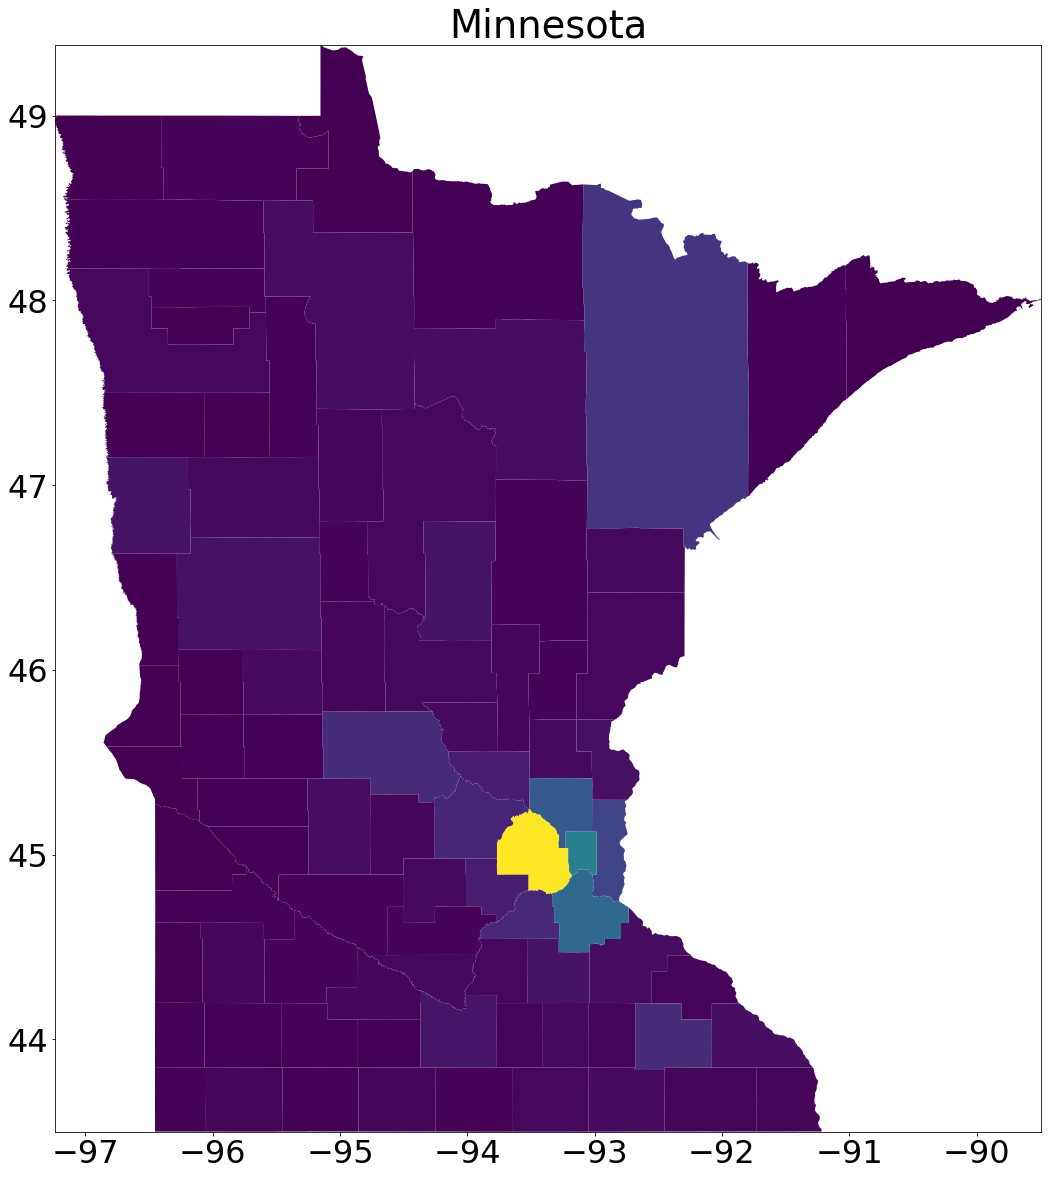

In [12]:
fig, ax = plt.subplots(figsize = (30,20))
map_data[map_data["state"] == "Minnesota"].plot(column = "Population", ax = ax)
ax.set_title("Minnesota")

Text(0.5, 1.0, 'North Dakota')

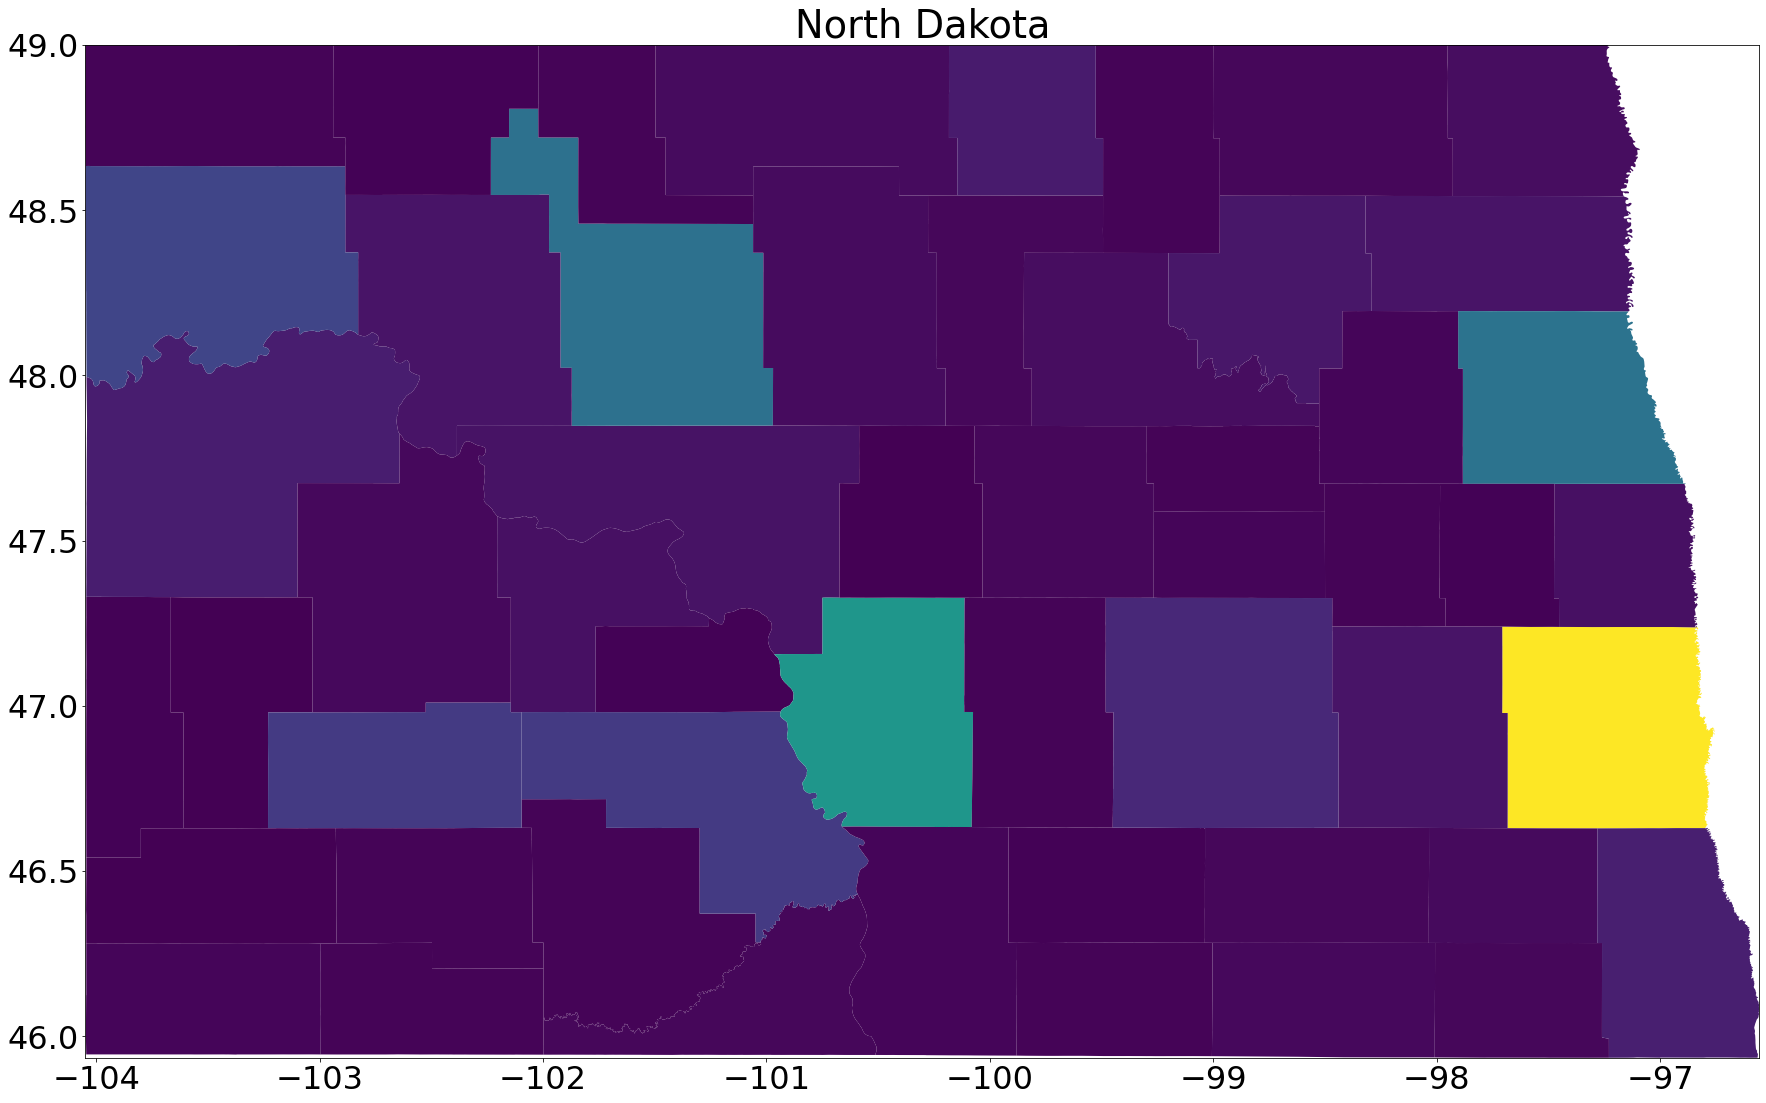

In [18]:
fig, ax = plt.subplots(figsize = (30,20))
map_data[map_data["state"] == "North Dakota"].plot(column = "Population", ax = ax)
ax.set_title("North Dakota")

In [13]:
def import_covid_data(FIPS_name):
    dataset = dw.load_dataset(
        "associatedpress/johns-hopkins-coronavirus-case-tracker",
        auto_update = True)
    covid_data = dataset.dataframes["2_cases_and_deaths_by_county_timeseries"]
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]
    
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(np.int64)
    # format the date columns as datetime
    covid_data["date"] = pd.to_datetime(covid_data["date"])
    covid_data.set_index([FIPS_name, "date"], inplace = True)
    covid_data["state_abr"] = ""   
    for state, abr in state_dict.items():
        covid_data.loc[covid_data["state"] == state, "state_abr"] = abr
    covid_data["Location"] = covid_data["location_name"] + ", " + \
                                       covid_data["state_abr"]
    
    return covid_data
    
    

In [15]:
covid_data = import_covid_data(FIPS_name = fips_name)
covid_data

C:\Users\faria\anaconda3\lib\site-packages\datadotworld\models\dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2021-11-29  84056045        county        Weston  Wyoming   
          2021-11-30  84056045        county        Weston  Wyoming   
          2021-12-01  84056045        county        Weston  Wyoming   
          2021-12-02  84056045        county        Weston  Wyoming   
          2021-12-03  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2021-11-29            7100.0              1193   
          2021-11-30            7100.0              1193   
          2021-12-01            7100.0              1193   
          2021-12-02            7100.0              1195   
          2021-12-03            7100.0              1197   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2021-11-29                      16802.82                 13   
          2021-11-30                      16802.82                 14   
          2021-12-01                      16802.82                 14   
          2021-12-02                      16830.99                 14   
          2021-12-03                      16859.15                 14   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                           0.00        NaN         NaN   
          2020-01-23                           0.00        0.0         0.0   
          2020-01-24                           0.00        0.0         0.0   
          2020-01-25                           0.00        0.0         0.0   
          2020-01-26                           0.00        0.0         0.0   
...                                             ...        ...         ...   
56045     2021-11-29                         183.10        4.0         0.0   
          2021-11-30                         197.18        0.0         1.0   
          2021-12-01                         197.18        0.0         0.0   
          2021-12-02                         197.18        2.0         0.0   
          2021-12-03                         197.18        2.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                    0.00   
          2020-01-24                   0.00                    0.00   
  

<AxesSubplot:xlabel='date'>

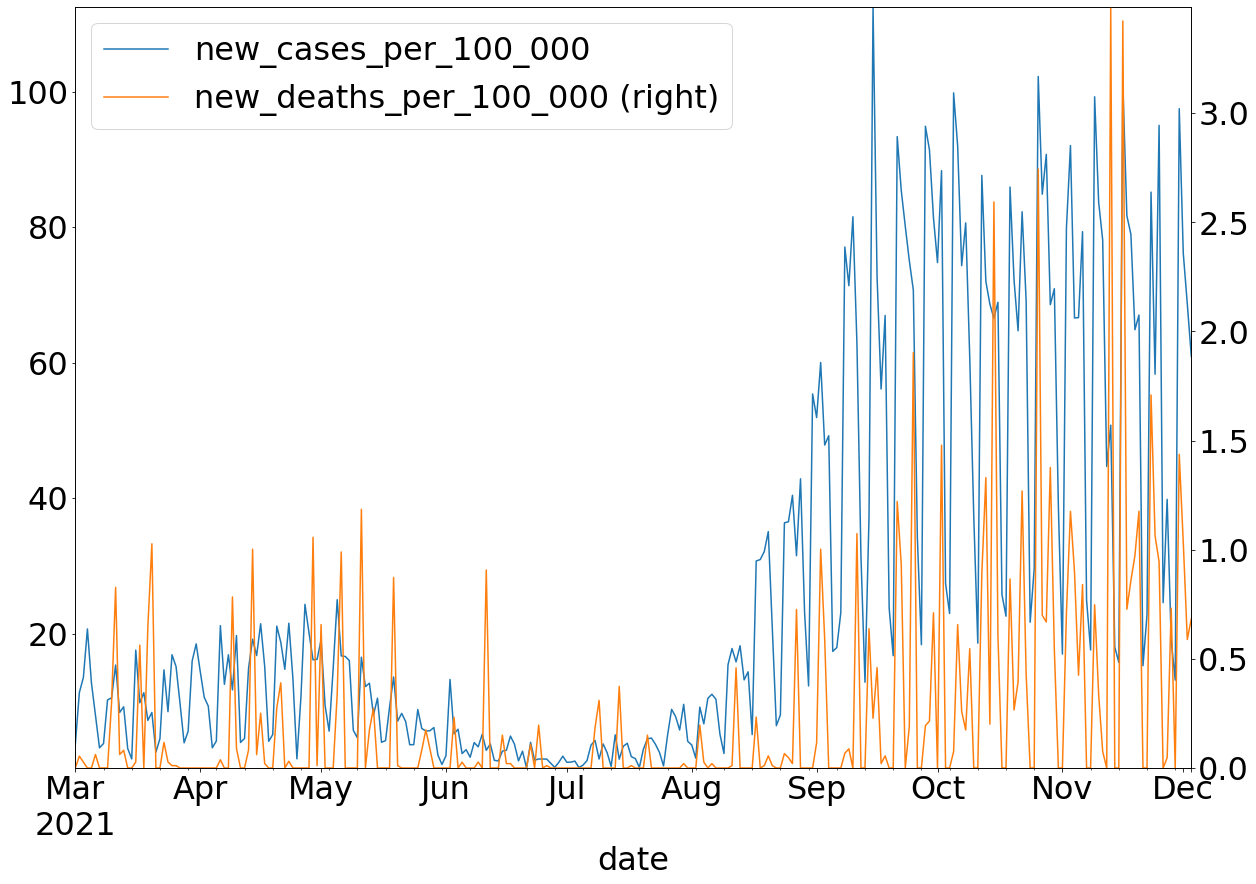

In [16]:
fig,ax = plt.subplots(figsize = (20,14))
covid_data[covid_data["state"] == "North Dakota"].groupby("date").mean().loc["2021-03-01":,["new_cases_per_100_000", "new_deaths_per_100_000"]].plot.line(
    secondary_y = "new_deaths_per_100_000", ax = ax)

In [17]:
covid_data[covid_data["state"] == "North Dakota"].groupby("date").mean()

,uid,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg
date,,,,,,,,,,,,
2020-01-22,84038053.0,14192.471698,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,84038053.0,14192.471698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2020-01-24,84038053.0,14192.471698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2020-01-25,84038053.0,14192.471698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2020-01-26,84038053.0,14192.471698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,84038053.0,14192.471698,3046.283019,19100.650943,35.415094,304.277736,2.849057,0.000000,13.123774,0.000000,7.445849,0.070189
2021-11-30,84038053.0,14192.471698,3062.150943,19198.161132,35.698113,305.713774,15.867925,0.283019,97.509245,1.436604,7.907736,0.086792
2021-12-01,84038053.0,14192.471698,3075.018868,19274.328113,35.811321,306.748491,12.867925,0.113208,76.167358,1.034340,8.456604,0.086226
